In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [2]:
df_scores = pd.read_csv('datasets/scores.csv')

In [3]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   101 non-null    float64
 1   score   101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
df_scores.head()

,hours,score
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


## Exploratory data analysis

In [5]:
df_scores.describe()

,hours,score
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


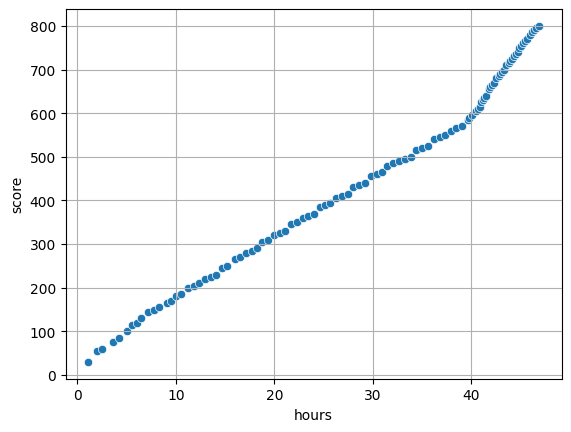

In [6]:
# Show a scatter plot of the data. This allows us to see if there is a linear relationship between the two variables.
plot = sns.scatterplot(x='hours', y='score', data=df_scores)  # Gráfico de dispersão
plot.grid(True)

<Axes: ylabel='hours'>

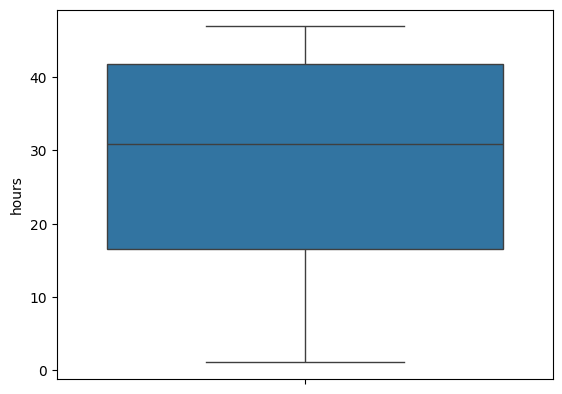

In [7]:
# Verify if there are any outliers in the "hours" column
sns.boxplot(y='hours', data=df_scores) # Gráfico de caixa

<Axes: ylabel='score'>

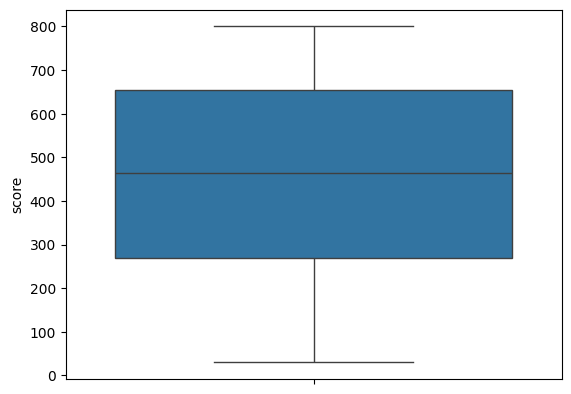

In [8]:
# Verify if there are any outliers in the "score" column
sns.boxplot(y='score', data=df_scores) # Gráfico de caixa

<Axes: >

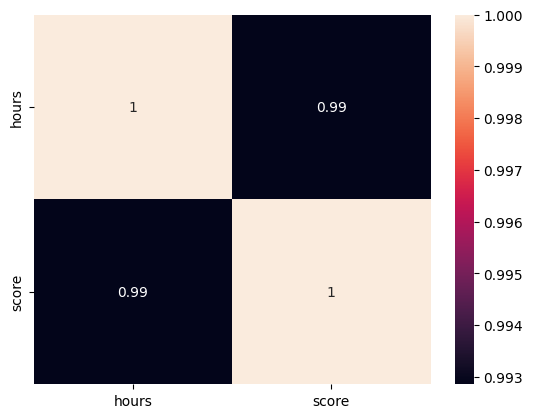

In [9]:
# Verify correlation between the two variables using the Pearson correlation coefficient
sns.heatmap(df_scores.corr("pearson"), annot=True)  # Gráfico de calor

<Axes: >

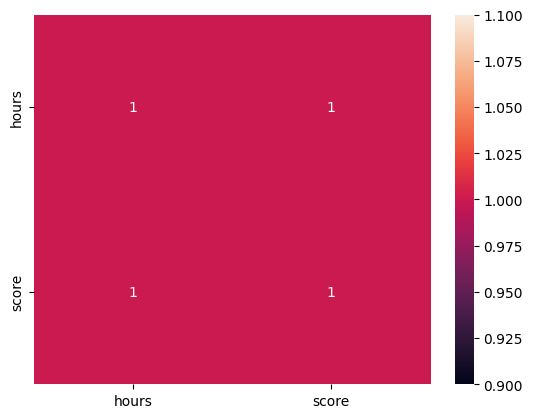

In [10]:
# Verify correlation between the two variables using the Spearman correlation coefficient
sns.heatmap(df_scores.corr("spearman"), annot=True)  # Gráfico de calor

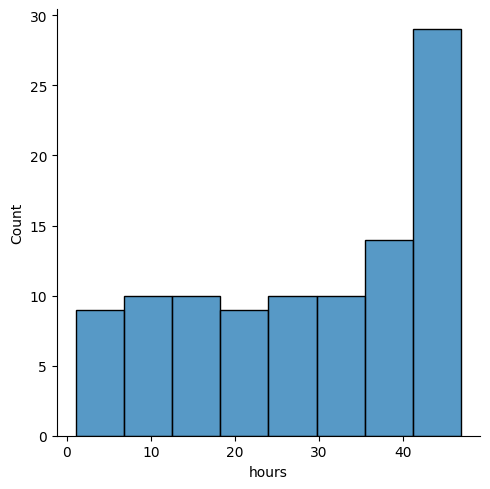

In [11]:
# Data distribution of the "hours" column
sns.displot(df_scores['hours'])  # Gráfico de densidade

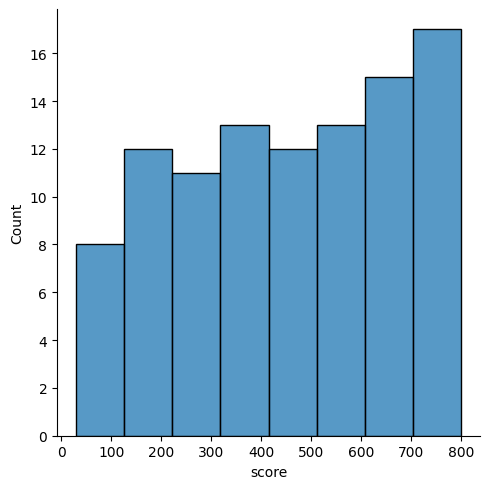

In [12]:
# Data distribution of the "score" column
sns.displot(df_scores['score'])  # Gráfico de densidade

## Training the model

In [13]:
# When we have only one independent variable, we need to reshape it to a 2D array (matrix).
X = df_scores['hours'].values.reshape(-1, 1)
y = df_scores['score'].values.reshape(-1, 1)

In [14]:
X[0:10]

array([[1.1],
       [2. ],
       [2.5],
       [3.6],
       [4.2],
       [5. ],
       [5.5],
       [6.1],
       [6.5],
       [7.2]])

In [15]:
y[0:10]

array([[ 30],
       [ 55],
       [ 60],
       [ 75],
       [ 85],
       [100],
       [115],
       [120],
       [130],
       [145]])

In [16]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Show the equation of the line (equação da reta)
intercept = model.intercept_
slope = model.coef_

print(f"y = {intercept[0]} + {slope[0][0]} * x")

y = 7.75356520349419 + 15.59813809595265 * x


## Validation

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [20]:
y_pred = model.predict(X_test)

In [21]:
# R² score (coeficiente de determinação). O R² é uma métrica que indica a proporção da variabilidade
# da variável dependente pela variável independente.
r2 = r2_score(y_test, y_pred)  # model.score(X_test, y_test)
print(f"R²: {r2}")

R²: 0.988458537799189


In [22]:
# Mean Absolute Error (MAE, erro absoluto médio). O MAE é a média do valor absoluto dos erros. Ele
# dá uma ideia de quão erradas estão as nossas previsões. No caso deste modelo, é quão errada está a
# previsão da nota do aluno.
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 18.911466057520023


In [23]:
# Mean Squared Error (MSE, erro quadrático médio). O MSE é a média do quadrado dos erros. É uma 
# métrica mais difícil de interpretar porque não está na mesma escalada que a variável dependente.
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 602.0734063884337


In [24]:
# Root Mean Squared Error (RMSE, raiz do erro quadrático médio). O RMSE é a raiz quadrada do MSE. Ele
# é mais fácil de interpretar porque está na mesma escala que a variável dependente. No caso deste
# modelo, ele representa quão errada está a previsão da nota do aluno.
rmse = root_mean_squared_error(y_test, y_pred)  # mse ** 0.5
print(f"RMSE: {rmse}")

RMSE: 24.537184157690827


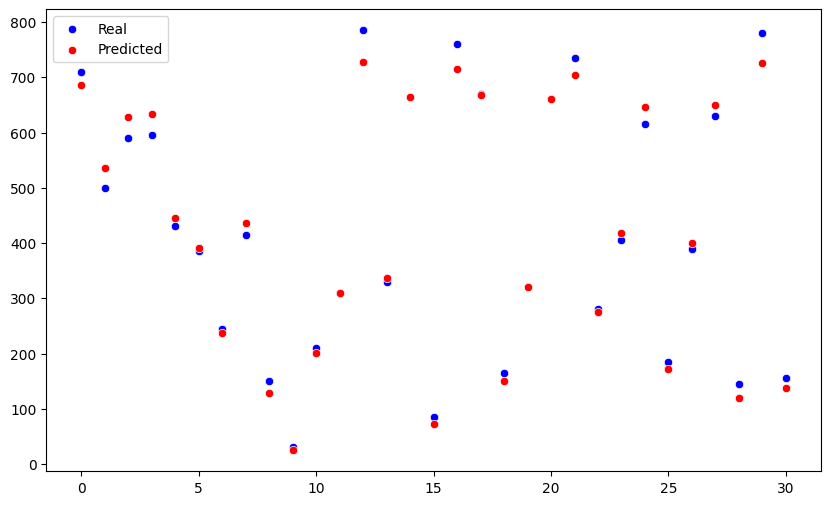

In [25]:
# Display the difference between the real and predicted values of the test set using a scatter plot
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Real')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Predicted')
plt.legend()
plt.show()

## Residual Analysis

In [26]:
# Calculate the residuals (differences between the real and predicted values)
residuals = y_test - y_pred
residuals

array([[ 23.72742762],
       [-36.53044666],
       [-38.55946142],
       [-38.23890285],
       [-14.50143189],
       [ -6.46776236],
       [  7.95380479],
       [-21.70236284],
       [ 20.58095765],
       [  5.08848289],
       [  8.82952241],
       [ -0.35744426],
       [ 56.61245476],
       [ -6.87427903],
       [  0.56482096],
       [ 11.73425479],
       [ 45.65077905],
       [  2.44519334],
       [ 15.30337812],
       [  0.28367288],
       [ -1.31555142],
       [ 31.56947572],
       [  5.51827336],
       [-12.98459713],
       [-30.71741333],
       [ 13.46598479],
       [-10.82664522],
       [-20.39685476],
       [ 24.93984051],
       [ 54.73208238],
       [ 17.7818886 ]])

In [27]:
# Calculate the z-scores of the residuals. Z-scores are a measure of how many standard deviations an
# element is from the mean.
from scipy.stats import zscore

residuals_z = zscore(residuals)

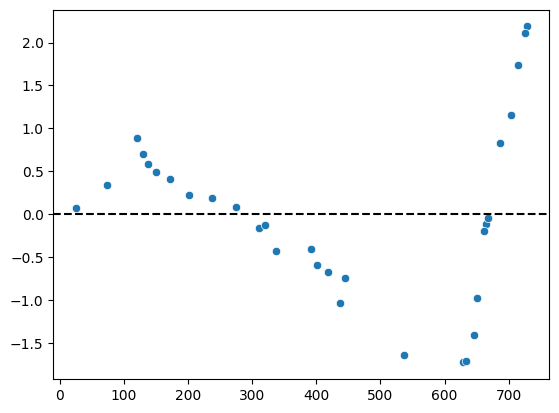

In [28]:
# Verify the linearity of the residuals. If the residuals are between -2 and 2 standard deviations,
# then the residuals are linear.
sns.scatterplot(x=y_pred.reshape(-1), y=residuals_z.reshape(-1))
plt.axhline(y=0, color='black', linestyle='--')

Text(0, 0.5, 'Observed quantiles')

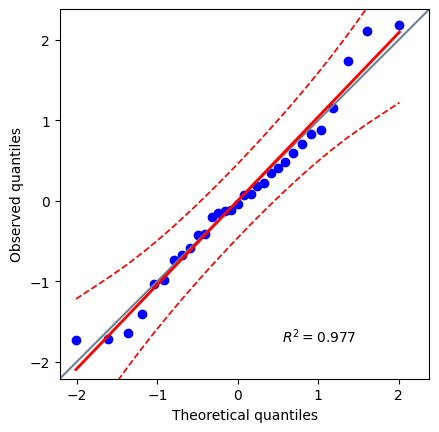

In [29]:
# QQ plot (quantile-quantile plot). The QQ plot is a graphical method for comparing two probability
# distributions by plotting their quantiles against each other. If the residuals are normally
# distributed, the points will form a straight line. If the residuals are not normally distributed,
# the points will deviate from the straight line.
import pingouin as pg

pg.qqplot(residuals, dist='norm', confidence=0.95)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Observed quantiles')  # Resíduos na escala padrão

In [30]:
# Shapiro-Wilk test. The Shapiro-Wilk test is a test of normality in frequentist statistics. It tests
# the null hypothesis that the data was drawn from a normal distribution. If the p-value is less than
# 0.05, we reject the null hypothesis and conclude that the data is not normally distributed.
shapiro_test = shapiro(residuals.reshape(-1))
shapiro_test

ShapiroResult(statistic=np.float64(0.9705965246814241), pvalue=np.float64(0.5356280271114633))

In [31]:
# Kolmogorov-Smirnov test. The Kolmogorov-Smirnov test is a test of normality in frequentist statistics.
# It tests the null hypothesis that the data was drawn from a normal distribution. If the p-value is less
# than 0.05, we reject the null hypothesis and conclude that the data is not normally distributed.
ks_test = kstest(residuals.reshape(-1), 'norm')
kstest

<function scipy.stats._stats_py.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto', *, axis=0, nan_policy='propagate', keepdims=False)>

## Predictions

In [32]:
# 30.9 is the median value of the "hours" column, which has a score of 465
model.predict([[30.9]])

array([[489.73603237]])

In [33]:
# How many hours do I need to study to get a score of 600?
# y = intercept + slope * x
# x = (y - intercept) / slope
hours = (600 - intercept) / slope
hours

array([[37.96904676]])

## Saving the model

In [34]:
import joblib
import os

os.makedirs('models', exist_ok=True)
joblib.dump(model, 'models/linear_regression_model.pkl')

['models/linear_regression_model.pkl']